# Load libraries

In [3]:
# Data handling libraries
import pandas as pd
import numpy as np

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# For handling warnings
import warnings
warnings.filterwarnings('ignore')


# Google mount

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Load the Data

In [4]:
# Specify the path to your dataset in Google Drive
data_path = '/content/_Emergency+Events+Database+-+Country+Profiles_emdat-country-profiles_2023_04_06 (3).xlsx'

# Use pd.read_excel to read Excel files
df = pd.read_excel(data_path) # Changed to pd.read_excel


# Display the first few rows of the dataset
df.head()


,Year,Country,ISO,Disaster Group,Disaster Subroup,Disaster Type,Disaster Subtype,Total Events,Total Affected,Total Deaths,"Total Damage (USD, original)","Total Damage (USD, adjusted)",CPI
0,#date +occurred,#country +name,#country +code,#cause +group,#cause +subgroup,#cause +type,#cause +subtype,#frequency,#affected +ind,#affected +ind +killed,NaN,#value +usd,NaN
1,1900,Cabo Verde,CPV,Natural,Climatological,Drought,Drought,1,NaN,11000,NaN,NaN,2.849084
2,1900,India,IND,Natural,Climatological,Drought,Drought,1,NaN,1250000,NaN,NaN,2.849084
3,1900,Jamaica,JAM,Natural,Hydrological,Flood,NaN,1,NaN,300,NaN,NaN,2.849084
4,1900,Japan,JPN,Natural,Geophysical,Volcanic activity,Ash fall,1,NaN,30,NaN,NaN,2.849084


# Data Preprocessing

In [5]:
# Remove the first row which seems to be a header with unwanted text
df = df[1:]

# Reset column names to remove unwanted placeholders
df.columns = ['Year', 'Country', 'ISO', 'Disaster Group', 'Disaster Subgroup', 'Disaster Type',
              'Disaster Subtype', 'Total Events', 'Total Affected', 'Total Deaths',
              'Total Damage (USD, original)', 'Total Damage (USD, adjusted)', 'CPI']

# Convert necessary columns to proper data types (e.g., numeric columns)
df['Total Deaths'] = pd.to_numeric(df['Total Deaths'], errors='coerce')  # Coerce errors to NaN
df['Total Affected'] = pd.to_numeric(df['Total Affected'], errors='coerce')
df['Total Damage (USD, original)'] = pd.to_numeric(df['Total Damage (USD, original)'], errors='coerce')
df['Total Damage (USD, adjusted)'] = pd.to_numeric(df['Total Damage (USD, adjusted)'], errors='coerce')
df['CPI'] = pd.to_numeric(df['CPI'], errors='coerce')

# Handle missing values
# For numerical columns, we can fill NaN with 0 or forward fill (or other methods)
df.fillna({'Total Deaths': 0, 'Total Affected': 0, 'Total Damage (USD, original)': 0,
           'Total Damage (USD, adjusted)': 0, 'CPI': df['CPI'].mean()}, inplace=True)

# Check for missing values in the columns after handling
missing_values = df.isnull().sum()
print("Missing values in each column after handling:")
print(missing_values)

# Convert Categorical Columns to Numerical using pd.factorize()
df['Disaster Group'] = pd.factorize(df['Disaster Group'])[0]
df['Disaster Subgroup'] = pd.factorize(df['Disaster Subgroup'])[0]
df['Disaster Type'] = pd.factorize(df['Disaster Type'])[0]
df['Disaster Subtype'] = pd.factorize(df['Disaster Subtype'])[0]
df['Country'] = pd.factorize(df['Country'])[0]

# Display the first few rows of the cleaned dataset
df.head()


Missing values in each column after handling:
Year                               0
Country                            0
ISO                                0
Disaster Group                     0
Disaster Subgroup                  0
Disaster Type                      0
Disaster Subtype                2133
Total Events                       0
Total Affected                     0
Total Deaths                       0
Total Damage (USD, original)       0
Total Damage (USD, adjusted)       0
CPI                                0
dtype: int64


,Year,Country,ISO,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Total Events,Total Affected,Total Deaths,"Total Damage (USD, original)","Total Damage (USD, adjusted)",CPI
1,1900,0,CPV,0,0,0,0,1,0.0,11000.0,0.0,0.0,2.849084
2,1900,1,IND,0,0,0,0,1,0.0,1250000.0,0.0,0.0,2.849084
3,1900,2,JAM,0,1,1,-1,1,0.0,300.0,0.0,0.0,2.849084
4,1900,3,JPN,0,2,2,1,1,0.0,30.0,0.0,0.0,2.849084
5,1900,4,TUR,0,2,3,2,1,0.0,140.0,0.0,0.0,2.849084


# Data Exploration

In [6]:
# Descriptive Statistics
# Use df.describe() to get a summary of numerical columns
print("Descriptive Statistics for Numerical Columns:")
print(df.describe())


Descriptive Statistics for Numerical Columns:
            Country  Disaster Group  Disaster Subgroup  Disaster Type  \
count  10431.000000         10431.0       10431.000000   10431.000000   
mean      67.933276             0.0           1.684019       2.993002   
std       57.641033             0.0           1.063043       2.405221   
min        0.000000             0.0           0.000000       0.000000   
25%       19.000000             0.0           1.000000       1.000000   
50%       49.000000             0.0           1.000000       3.000000   
75%      106.000000             0.0           3.000000       4.000000   
max      224.000000             0.0           4.000000      12.000000   

       Disaster Subtype  Total Affected  Total Deaths  \
count      10431.000000    1.043100e+04  1.043100e+04   
mean           5.722078    8.188671e+05  2.197236e+03   
std            6.128829    8.338960e+06  6.102373e+04   
min           -1.000000    0.000000e+00  0.000000e+00   
25%        

<Figure size 1000x600 with 0 Axes>

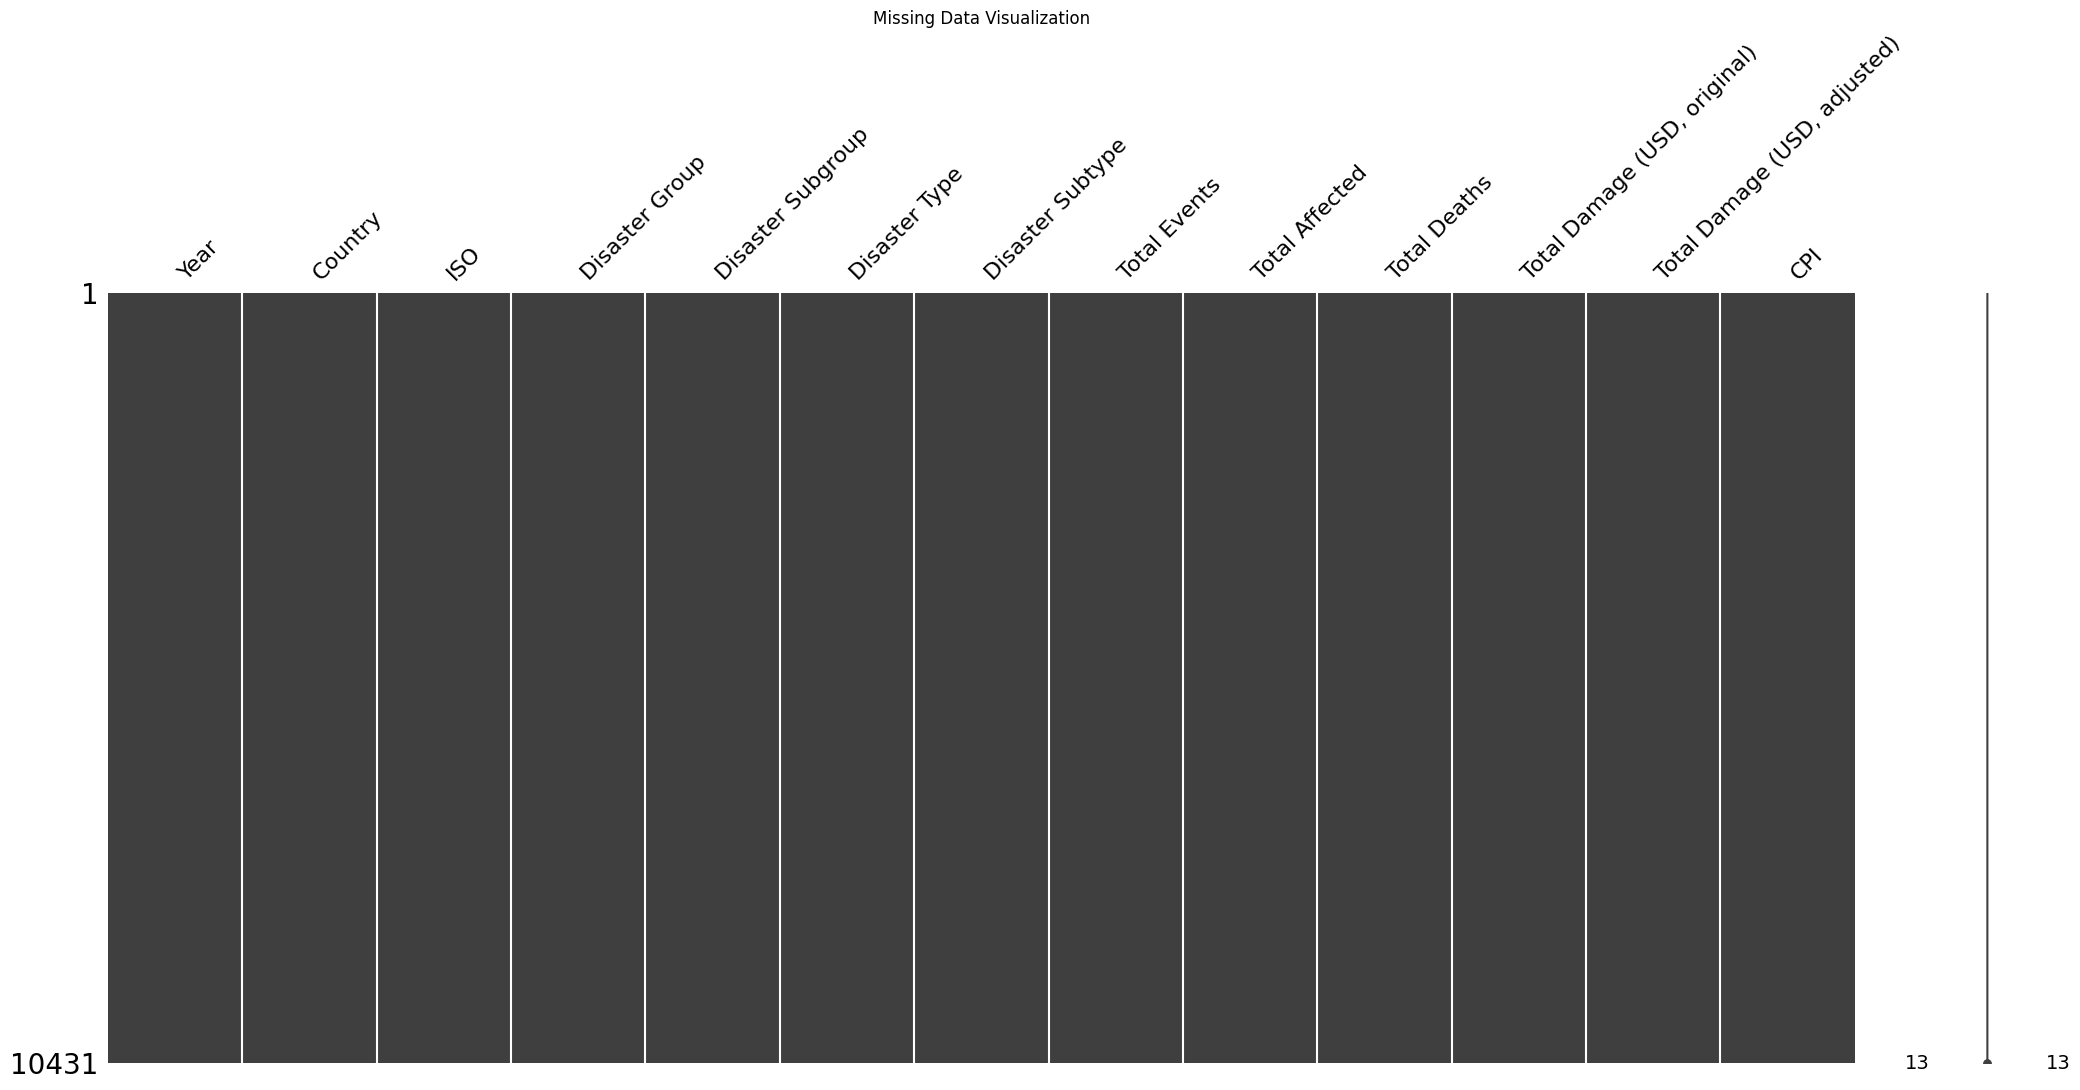

In [7]:

# Visualize Missing Data using missingno
import missingno as msno

# Visualize missing data patterns
plt.figure(figsize=(10, 6))
msno.matrix(df)
plt.title('Missing Data Visualization')
plt.show()



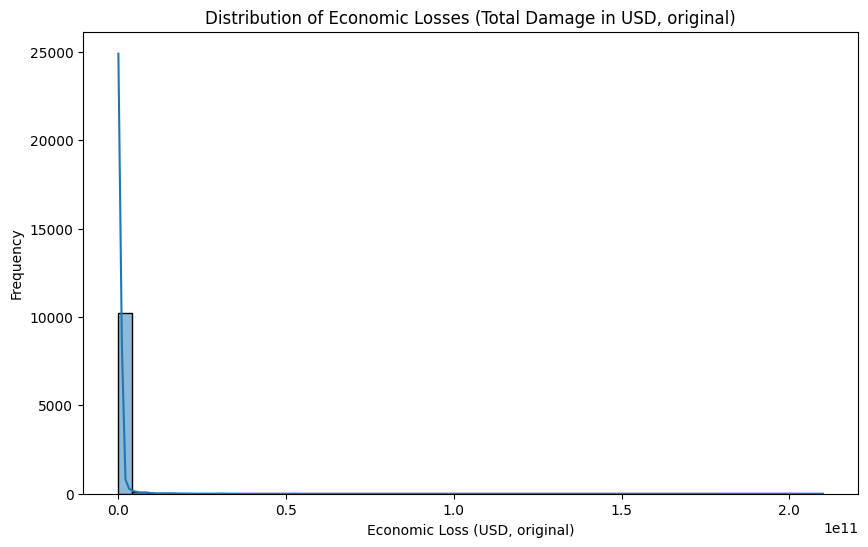

In [8]:

# Visualize the Distribution of 'Total Damage (USD, original)' (economic losses)
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Damage (USD, original)'], bins=50, kde=True)
plt.title('Distribution of Economic Losses (Total Damage in USD, original)')
plt.xlabel('Economic Loss (USD, original)')
plt.ylabel('Frequency')
plt.show()


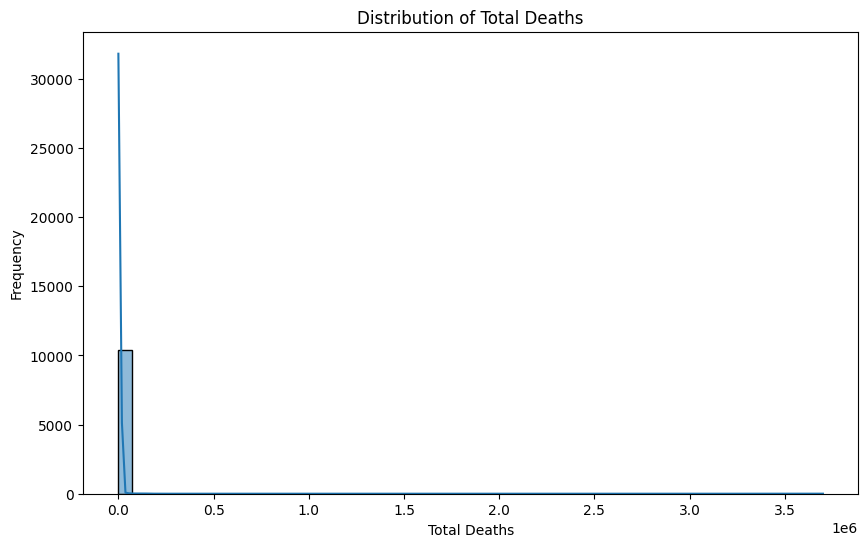

In [9]:

# Visualize the Distribution of 'Total Deaths'
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Deaths'], bins=50, kde=True)
plt.title('Distribution of Total Deaths')
plt.xlabel('Total Deaths')
plt.ylabel('Frequency')
plt.show()

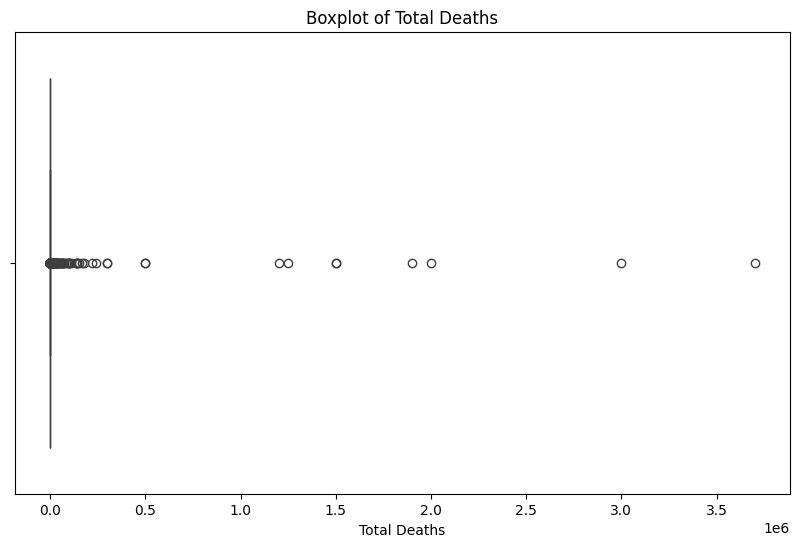

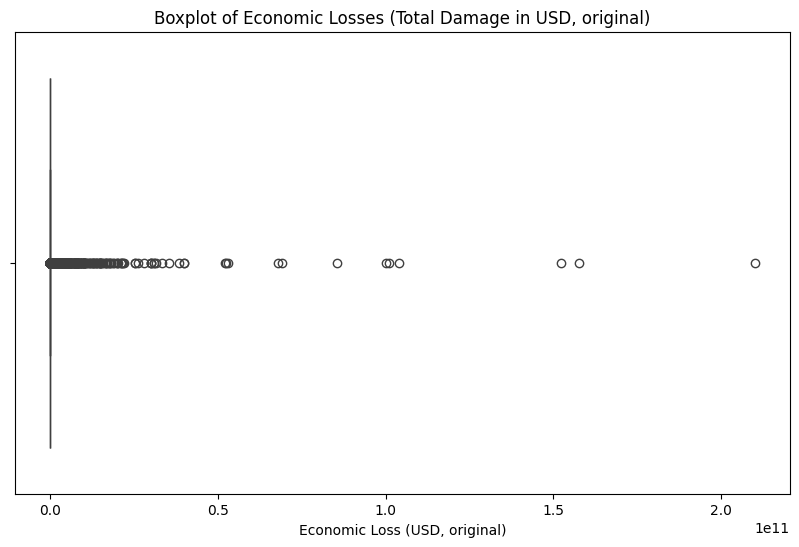

In [10]:
# Boxplot for Total Deaths
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Total Deaths'])
plt.title('Boxplot of Total Deaths')
plt.xlabel('Total Deaths')
plt.show()

# Boxplot for Total Damage (USD, original) - Economic Losses
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Total Damage (USD, original)'])
plt.title('Boxplot of Economic Losses (Total Damage in USD, original)')
plt.xlabel('Economic Loss (USD, original)')
plt.show()


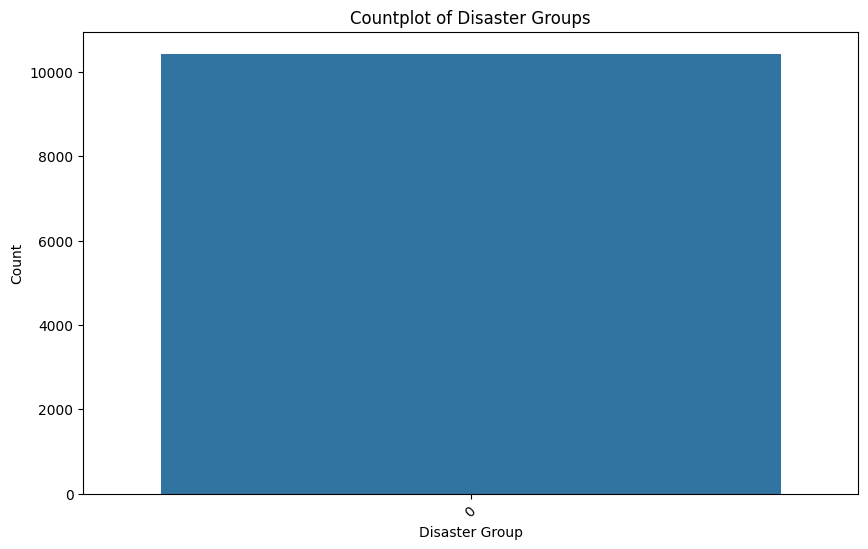

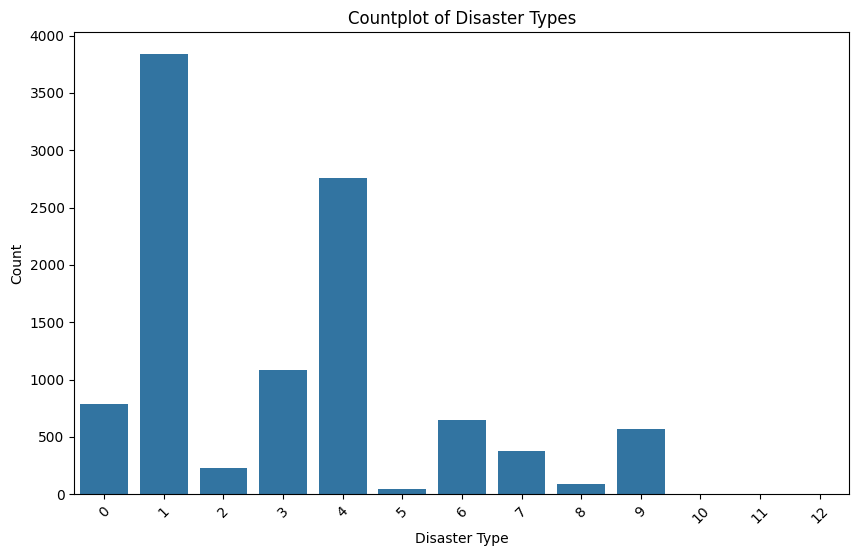

In [11]:
# Countplot for Disaster Group
plt.figure(figsize=(10, 6))
sns.countplot(x=df['Disaster Group'])
plt.title('Countplot of Disaster Groups')
plt.xlabel('Disaster Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Countplot for Disaster Type
plt.figure(figsize=(10, 6))
sns.countplot(x=df['Disaster Type'])
plt.title('Countplot of Disaster Types')
plt.xlabel('Disaster Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


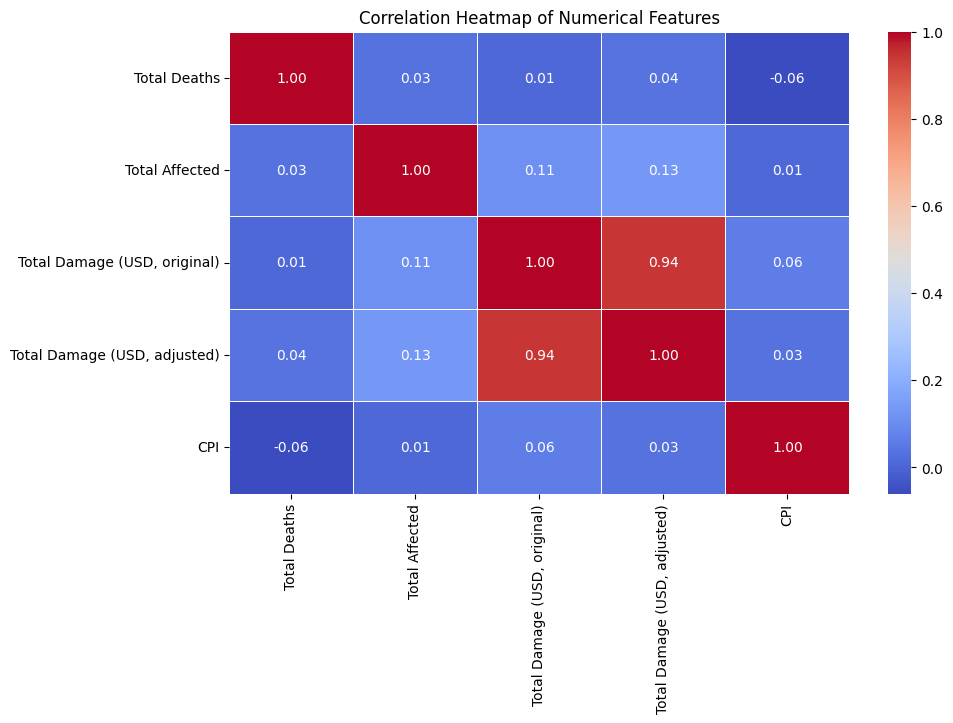

In [12]:
# Calculate the correlation matrix
correlation_matrix = df[['Total Deaths', 'Total Affected', 'Total Damage (USD, original)',
                         'Total Damage (USD, adjusted)', 'CPI']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


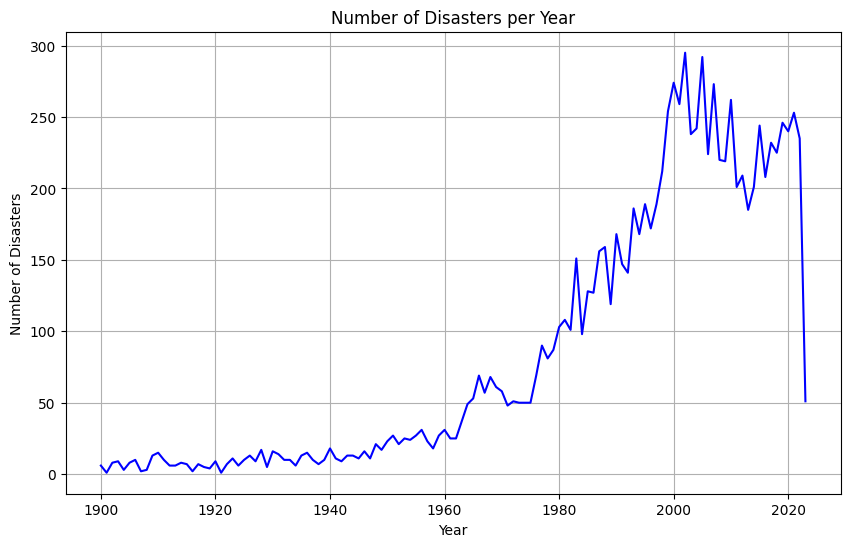

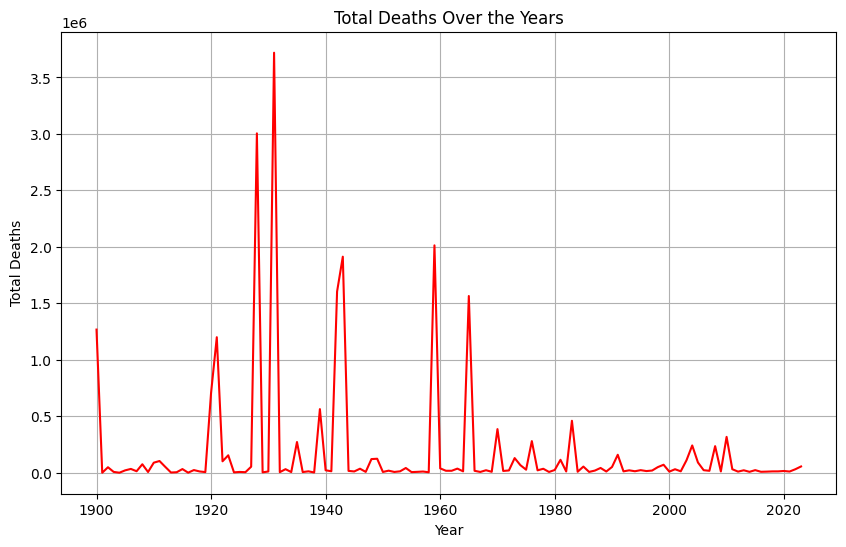

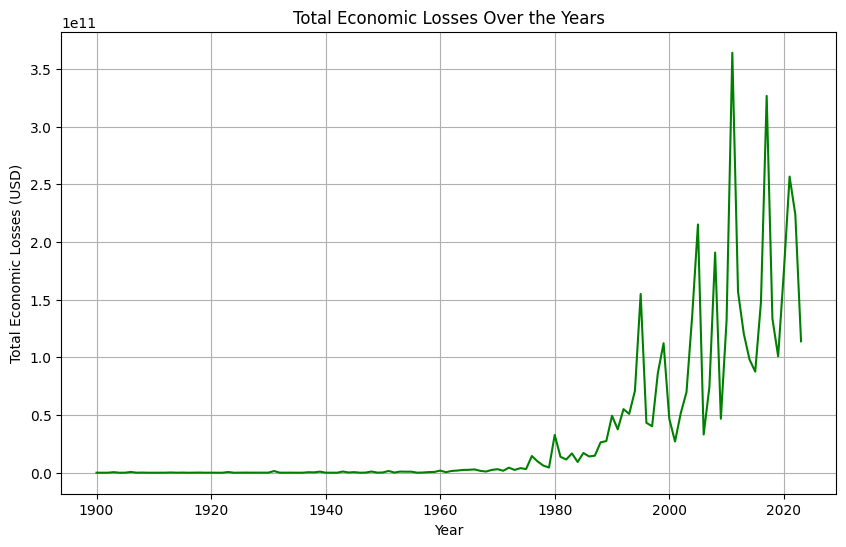

In [13]:
# Time series plot for the number of disasters per year
disasters_per_year = df.groupby('Year').size()

plt.figure(figsize=(10, 6))
disasters_per_year.plot(kind='line', color='blue')
plt.title('Number of Disasters per Year')
plt.xlabel('Year')
plt.ylabel('Number of Disasters')
plt.grid(True)
plt.show()

# Time series plot for Total Deaths over the years
deaths_per_year = df.groupby('Year')['Total Deaths'].sum()

plt.figure(figsize=(10, 6))
deaths_per_year.plot(kind='line', color='red')
plt.title('Total Deaths Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.grid(True)
plt.show()

# Time series plot for Total Economic Losses over the years
economic_losses_per_year = df.groupby('Year')['Total Damage (USD, original)'].sum()

plt.figure(figsize=(10, 6))
economic_losses_per_year.plot(kind='line', color='green')
plt.title('Total Economic Losses Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Economic Losses (USD)')
plt.grid(True)
plt.show()


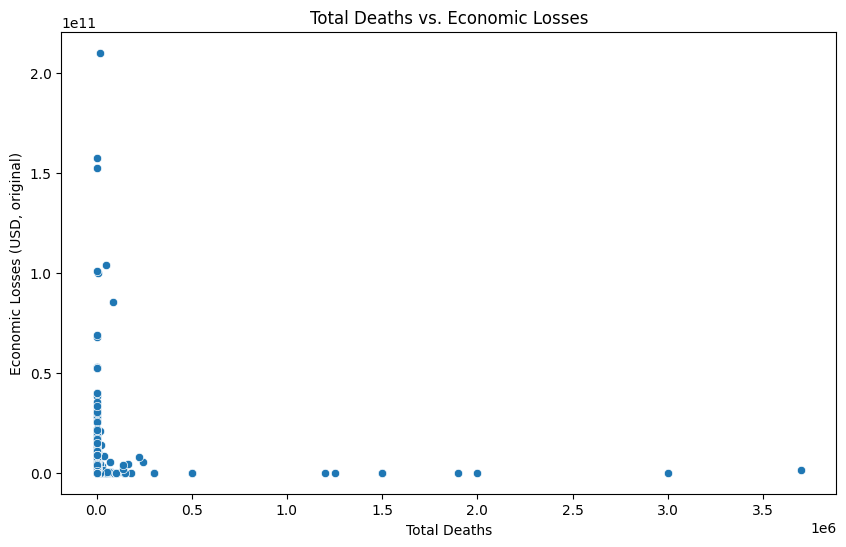

In [14]:
# Scatterplot for Total Deaths vs. Total Damage (USD, original)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Total Deaths'], y=df['Total Damage (USD, original)'])
plt.title('Total Deaths vs. Economic Losses')
plt.xlabel('Total Deaths')
plt.ylabel('Economic Losses (USD, original)')
plt.show()


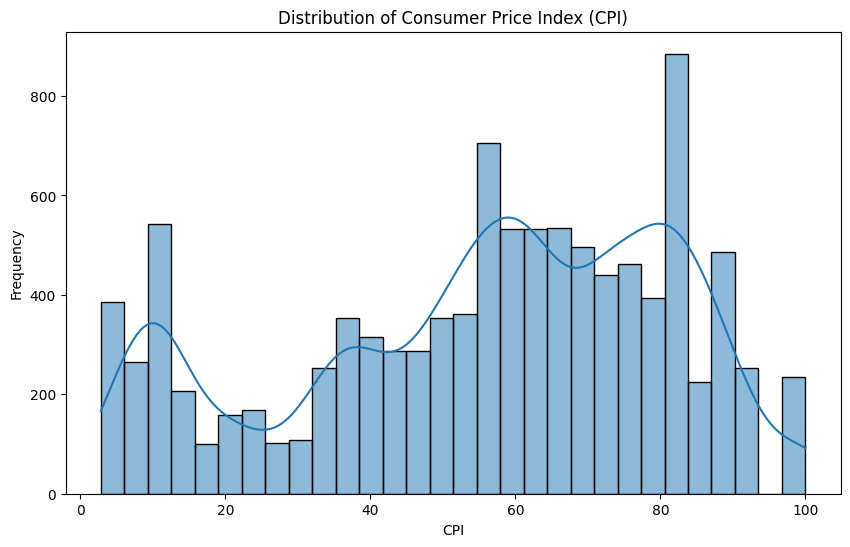

In [15]:
# Distribution of CPI (Consumer Price Index)
plt.figure(figsize=(10, 6))
sns.histplot(df['CPI'], bins=30, kde=True)
plt.title('Distribution of Consumer Price Index (CPI)')
plt.xlabel('CPI')
plt.ylabel('Frequency')
plt.show()


# Correlation Analysis

Correlation Matrix:
                              Total Deaths  Total Affected  \
Total Deaths                      1.000000        0.032402   
Total Affected                    0.032402        1.000000   
Total Damage (USD, original)      0.008300        0.112541   
Total Damage (USD, adjusted)      0.035143        0.130585   
CPI                              -0.060173        0.008522   

                              Total Damage (USD, original)  \
Total Deaths                                      0.008300   
Total Affected                                    0.112541   
Total Damage (USD, original)                      1.000000   
Total Damage (USD, adjusted)                      0.943811   
CPI                                               0.060994   

                              Total Damage (USD, adjusted)       CPI  
Total Deaths                                      0.035143 -0.060173  
Total Affected                                    0.130585  0.008522  
Total Damage (USD, or

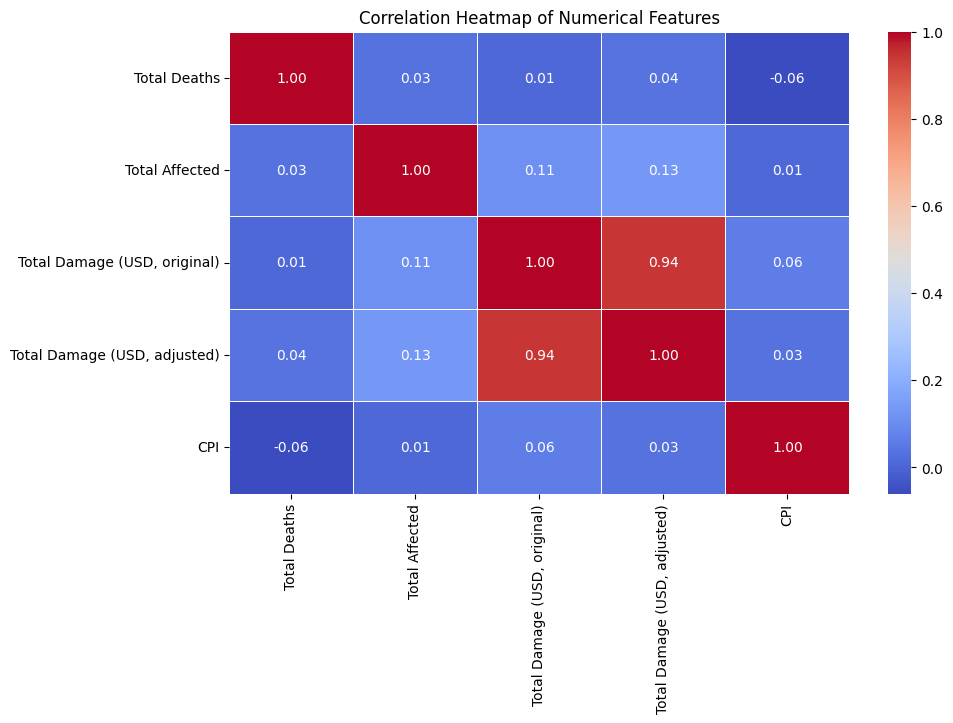

In [16]:
# Calculate the correlation matrix for relevant numeric columns
correlation_matrix = df[['Total Deaths', 'Total Affected', 'Total Damage (USD, original)',
                         'Total Damage (USD, adjusted)', 'CPI']].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the Correlation Matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


In [33]:
# prompt: make code for one more model like decision tree algorithm

from sklearn.tree import DecisionTreeRegressor

# Define features (X) and target variable (y)
X = df.drop(['Total Deaths', 'ISO'], axis=1)  # Drop the 'Total Deaths' and 'ISO' columns
y = df['Total Deaths']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)  # You can tune hyperparameters here
dt_model.fit(X_train, y_train)

# Make predictions on the test set
dt_predictions = dt_model.predict(X_test)

# Evaluate the Decision Tree Regressor model
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)

print(f"Decision Tree Regressor - Mean Squared Error: {dt_mse}")
print(f"Decision Tree Regressor - R-squared: {dt_r2}")

Decision Tree Regressor - Mean Squared Error: 2858246432.458553
Decision Tree Regressor - R-squared: -12.984239431823143


# Feature Selection

In [17]:
# Select relevant features for analysis
# Features (X) - include columns related to disaster type, deaths, economic loss, etc.
X = df[['Disaster Group', 'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype',
        'Total Affected', 'Total Deaths', 'CPI']]

# Target variable (y) - economic loss (total damage in USD, original)
y = df['Total Damage (USD, original)']

# Display the first few rows of X and y to check the selection
print("Feature set (X):")
print(X.head())

print("\nTarget variable (y):")
print(y.head())


Feature set (X):
   Disaster Group  Disaster Subgroup  Disaster Type  Disaster Subtype  \
1               0                  0              0                 0   
2               0                  0              0                 0   
3               0                  1              1                -1   
4               0                  2              2                 1   
5               0                  2              3                 2   

   Total Affected  Total Deaths       CPI  
1             0.0       11000.0  2.849084  
2             0.0     1250000.0  2.849084  
3             0.0         300.0  2.849084  
4             0.0          30.0  2.849084  
5             0.0         140.0  2.849084  

Target variable (y):
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
Name: Total Damage (USD, original), dtype: float64


# Split Data for Training and Testing

In [18]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set size (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing set size (X_test, y_test):", X_test.shape, y_test.shape)


Training set size (X_train, y_train): (8344, 7) (8344,)
Testing set size (X_test, y_test): (2087, 7) (2087,)


# Linear Regression model

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)

# Display the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


Mean Squared Error (MSE): 2.867671935514289e+19
R-squared (R2): 0.012477389074047274


# Make Predictions

          Actual     Predicted
3134         0.0  3.830480e+08
7750  30000000.0  9.301553e+08
3964    500000.0  8.738108e+07
8072         0.0  4.293743e+07
5082   1900000.0  4.370206e+08


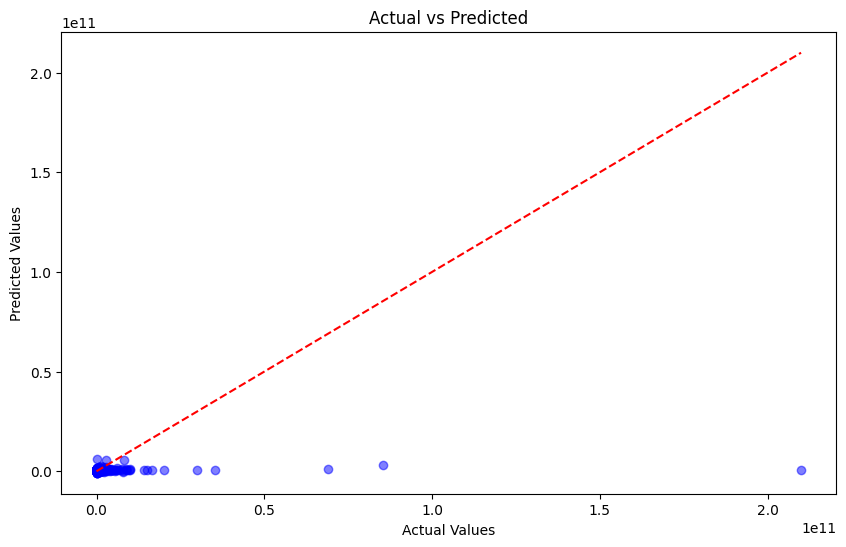

In [20]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Display the first few predicted values alongside the actual values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions.head())

# Optionally, visualize the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


# Evaluate Model Performance

In [21]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared score

# Display the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")



Mean Squared Error (MSE): 2.867671935514289e+19
R-squared (R2): 0.012477389074047274


# Visualize the Results

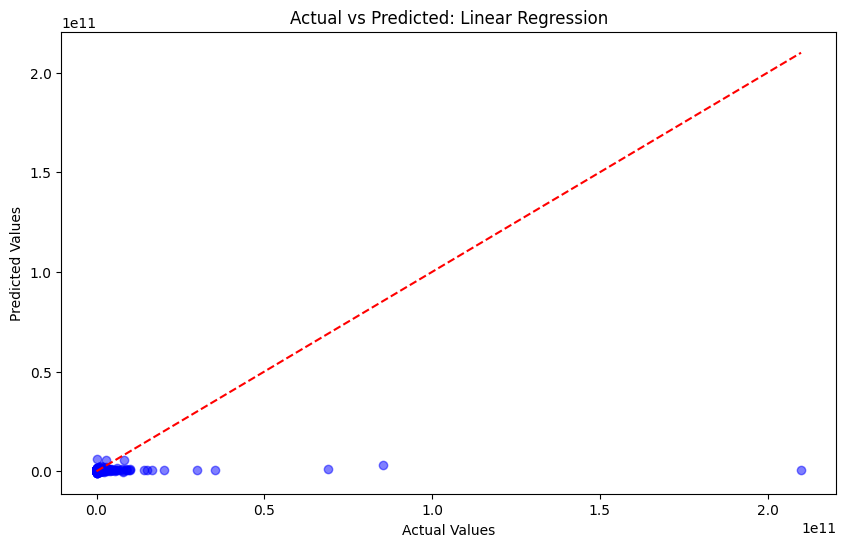

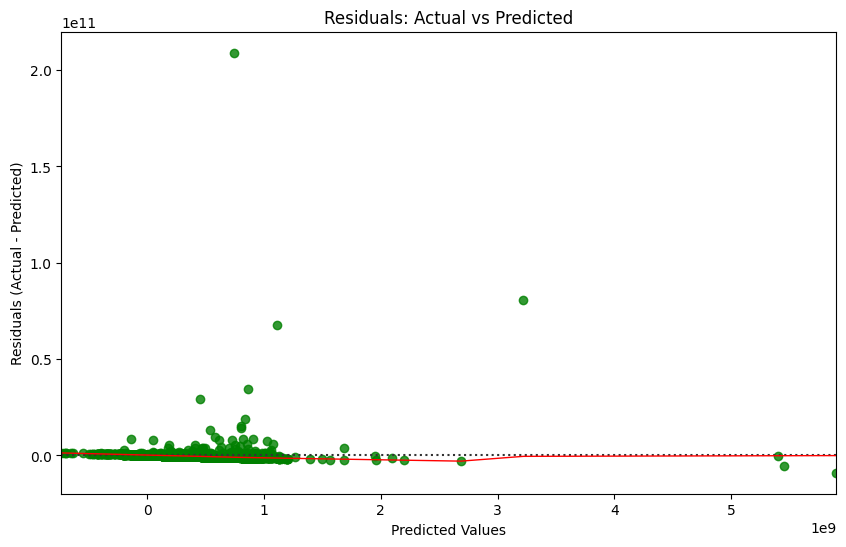

In [22]:
# Visualize Actual vs Predicted values

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted: Linear Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Residual plot (Actual - Predicted)
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=y_test - y_pred, lowess=True, color='green', line_kws={'color': 'red', 'lw': 1})
plt.title('Residuals: Actual vs Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()


# Comparison of both models

Linear Regression - Mean Squared Error: 229396390.70211616
Linear Regression - R-squared: -0.12234341166135909
Decision Tree Regressor - Mean Squared Error: 2858246432.458553
Decision Tree Regressor - R-squared: -12.984239431823143

Model Comparison:
Metric               Linear Regression    Decision Tree       
Mean Squared Error   229396390.70         2858246432.46       
R-squared            -0.12                -12.98              


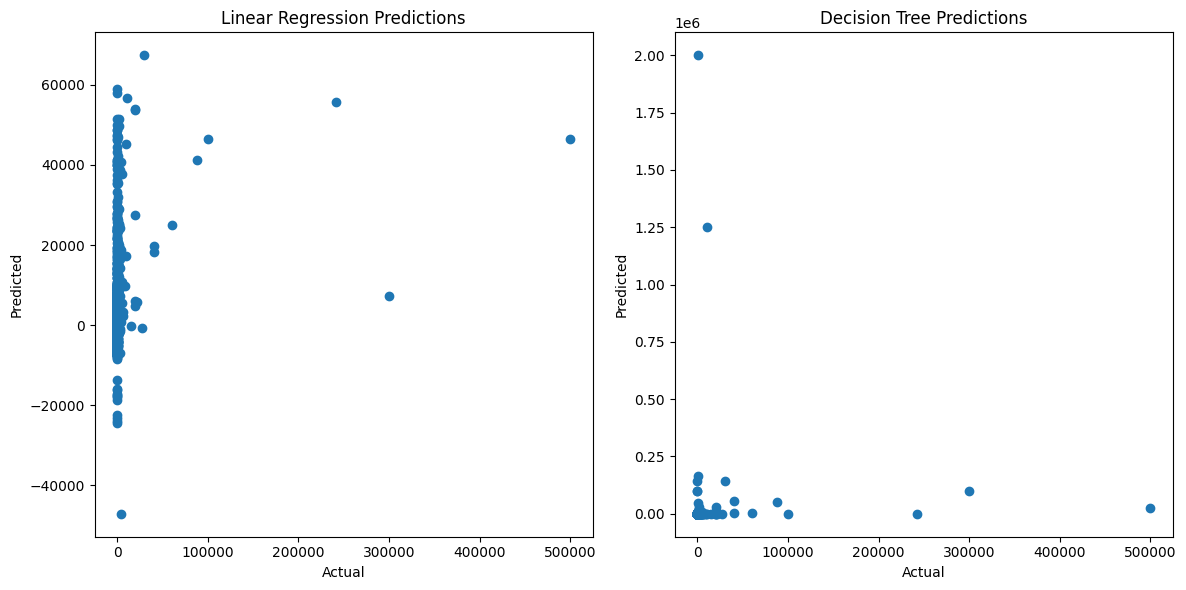

In [37]:
# prompt: compare the both algorithm

# Compare Linear Regression and Decision Tree Regressor

# ... (Your existing code for data loading, preprocessing, and visualization) ...


# Define features (X) and target variable (y) - same as before
X = df.drop(['Total Deaths', 'ISO'], axis=1)
y = df['Total Deaths']

# Split data into training and testing sets - same as before
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model (already in your code)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

print(f"Linear Regression - Mean Squared Error: {lr_mse}")
print(f"Linear Regression - R-squared: {lr_r2}")

# Decision Tree Regressor Model (already in your code)
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)

print(f"Decision Tree Regressor - Mean Squared Error: {dt_mse}")
print(f"Decision Tree Regressor - R-squared: {dt_r2}")

# Comparison
print("\nModel Comparison:")
print(f"{'Metric':<20} {'Linear Regression':<20} {'Decision Tree':<20}")
print(f"{'Mean Squared Error':<20} {lr_mse:<20.2f} {dt_mse:<20.2f}")
print(f"{'R-squared':<20} {lr_r2:<20.2f} {dt_r2:<20.2f}")

# You can add more comparison metrics or visualization as needed.

# Example visualization for comparison (scatter plots)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, lr_predictions)
plt.title('Linear Regression Predictions')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(1, 2, 2)
plt.scatter(y_test, dt_predictions)
plt.title('Decision Tree Predictions')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()


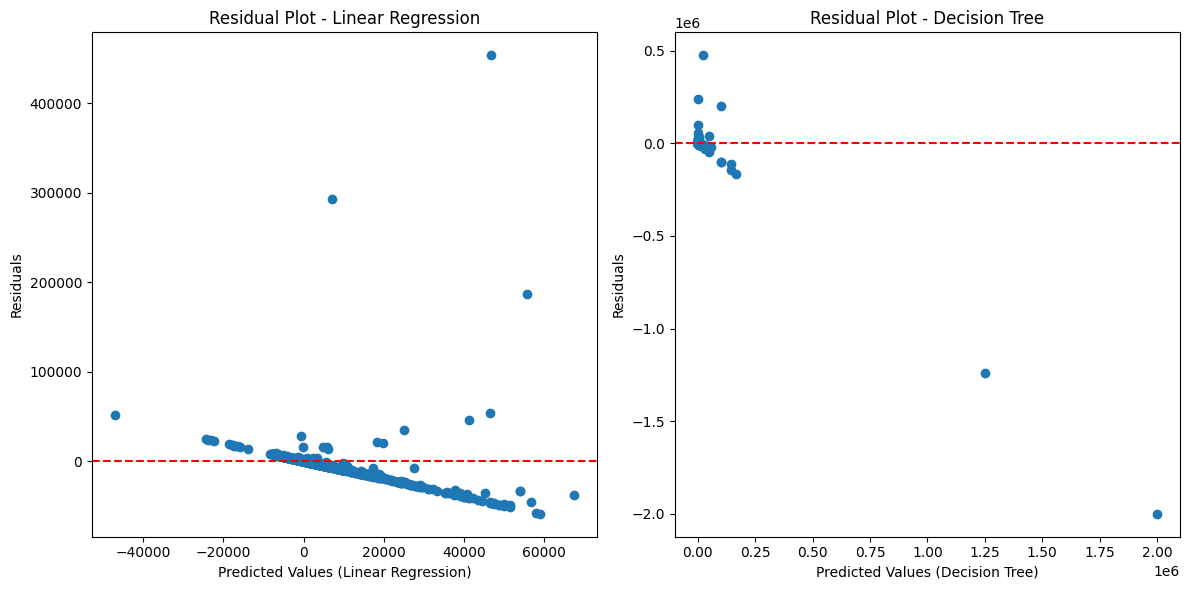

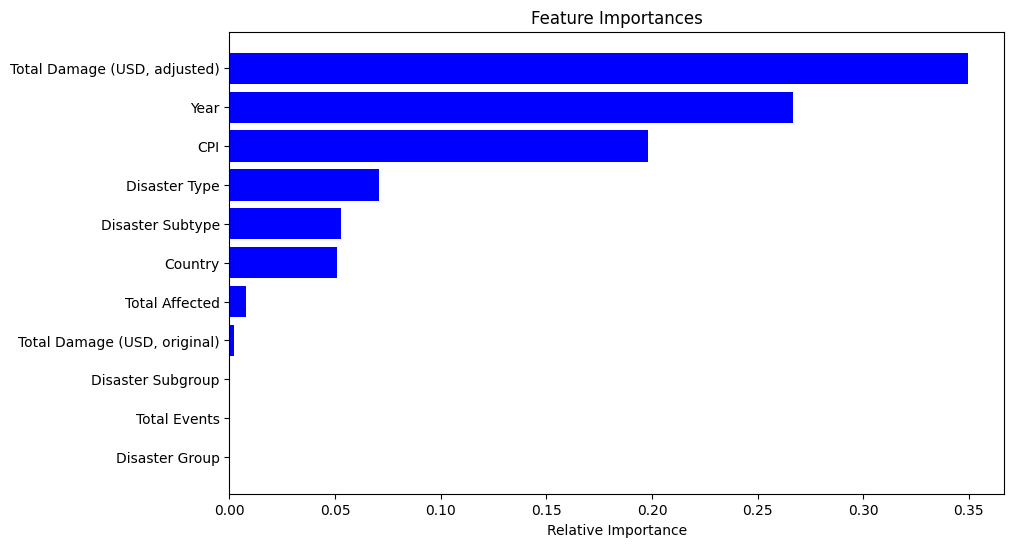

In [38]:
# prompt: visualize the models other than actual and predicted

import matplotlib.pyplot as plt

# Assuming 'lr_predictions' and 'dt_predictions' are already calculated

# Residual plots for both models
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(lr_predictions, y_test - lr_predictions)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values (Linear Regression)")
plt.ylabel("Residuals")
plt.title("Residual Plot - Linear Regression")

plt.subplot(1, 2, 2)
plt.scatter(dt_predictions, y_test - dt_predictions)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values (Decision Tree)")
plt.ylabel("Residuals")
plt.title("Residual Plot - Decision Tree")

plt.tight_layout()
plt.show()


# Feature Importance (Decision Tree only)
plt.figure(figsize=(10,6))
importances = dt_model.feature_importances_
indices = np.argsort(importances)
features = X_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
